Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'cluster'],
      dtype='object')


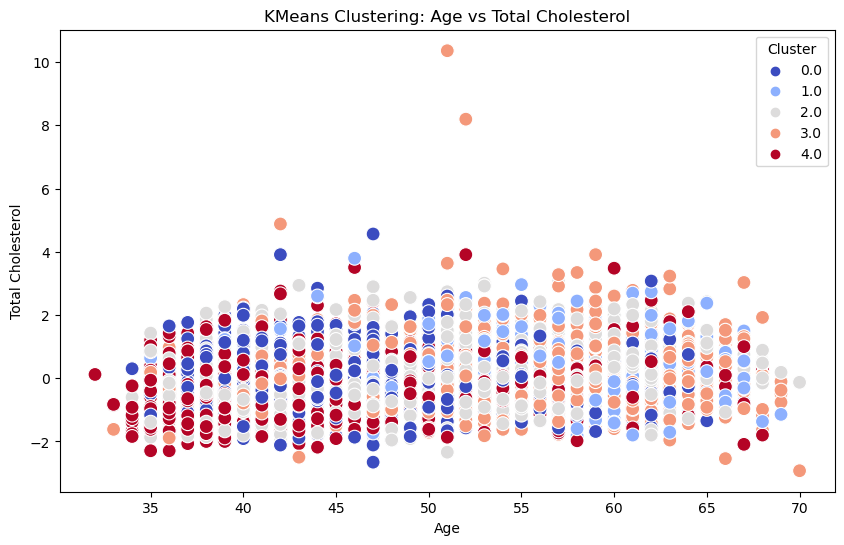

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 

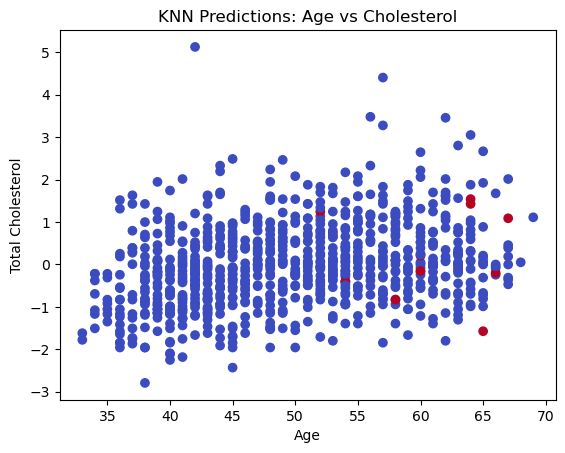

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.neighbors._classification")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.preprocessing import StandardScaler 
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns



cancer_research = pd.read_csv('framingham.csv')

#missing values were checked using the code from line 18-21. Since the data is mixed with categorical values 
# and non-categorical(contiuous) values, mode imputation was used on categorical values and mean() was used on numerical
# data to avoid any biased data.

categoricalColumns = ['cigsPerDay','BPMeds', 'education']
cancer_research[categoricalColumns] = cancer_research[categoricalColumns].fillna(cancer_research[categoricalColumns].mode().iloc[0])
    
numericalColumns = ['totChol', 'BMI', 'heartRate', 'glucose']
cancer_research[numericalColumns] = cancer_research[numericalColumns].fillna(cancer_research[numericalColumns].mean().iloc[0])

# Check for missing values in each column
missing_values = cancer_research.isna().sum()

# Display columns with only the missing values
#print(missing_values[missing_values > 0])


cancer_research.head()


scaler = StandardScaler()
cancer_research[numericalColumns] = scaler.fit_transform(cancer_research[numericalColumns])


x = cancer_research[['age','totChol', 'cigsPerDay', 'sysBP', 'diaBP']]
y = cancer_research['TenYearCHD']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
start_time = time.time()

#without the for loop , n was 5 and the training accurracy was 1.0 while test accuracy was .85 
#which indicated overfitting.. with the for loop, it reduced it somewhat and it also impacted the graph...


data_model = KMeans(n_clusters=5, random_state=0)
data_model.fit(x_train)
 
end_time = time.time()
cpu_time = end_time - start_time

x_train['cluster'] = data_model.labels_
x_test['cluster'] = data_model.predict(x_test)


#print(x_train[['cluster']])

cancer_research['cluster'] = x_train['cluster']

print(cancer_research.columns)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cancer_research, x='age', y='totChol', hue='cluster', palette='coolwarm', s=100)

plt.title('KMeans Clustering: Age vs Total Cholesterol')
plt.xlabel('Age')
plt.ylabel('Total Cholesterol')
plt.legend(title='Cluster')
plt.savefig('kmeans',bbox_inches='tight')
plt.show()

for i in range(1,5):
    knn_model = KNeighborsClassifier(n_neighbors = i, weights = 'uniform')
    knn_model.fit(x_train[['age', 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'cluster']], y_train)

y_test_predict = knn_model.predict(x_test[['age', 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'cluster']])
print(y_test_predict)

y_train_predict = knn_model.predict(x_train[['age', 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'cluster']])
print(y_train_predict)

# To print all the feature columns from x_train (or any DataFrame)
#print(x_train.columns)

    
accuracy = accuracy_score(y_test, y_test_predict)
print(f'Accuracy: {accuracy:.2f}')

train_accuracy = accuracy_score(y_train, y_train_predict)
print(f'Neighbors: {i}, Training Accuracy: {train_accuracy:.2f}')


f1 = f1_score(y_test, y_test_predict)
print(f'F1score: {f1:.2f}')

precision_score = precision_score(y_test, y_test_predict) 
print(f'Precision: {precision_score:.2f}')

print("CPU Time",cpu_time,"\n")

plt.scatter(x_test['age'], x_test['totChol'], c=y_test_predict, cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Total Cholesterol')
plt.title('KNN Predictions: Age vs Cholesterol')
plt.show()


